In [1]:
import numpy
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv
import random

In [14]:
TRAIN_DIR = "C:/Users/Yashwanth/Downloads/Datasets/Handwritten_digit_dataset/train.csv"
TEST_DIR = "C:/Users/Yashwanth/Downloads/Datasets/Handwritten_digit_dataset/test.csv"
IMG_SIZE = 28

In [15]:
def chunks(l):
    return [l[i:i+28] for i in range(0, len(l), 28)]

In [16]:
# For Testing the images
def display_image(img):
    img = numpy.array(img, dtype=numpy.uint8)
    plt.imshow(img,cmap = "gray")
    plt.show()

In [17]:
def create_training_data():
    with open(TRAIN_DIR, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)
    train_data = []
    data = data[1:len(data)]
    j = 0
    for i in tqdm(data):
        label = i[0]
        img = chunks(i[1:len(i)])
        img = numpy.array(img, dtype=np.uint8)
        if(j < 3):
            display_image(img)
        train_data.append([numpy.array(img),numpy.array(label)]) 
        j += 1
    return train_data

  0%|          | 0/42000 [00:00<?, ?it/s]

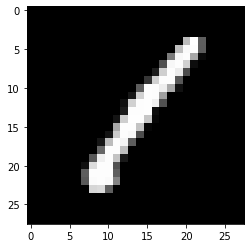

  0%|          | 1/42000 [00:00<7:38:33,  1.53it/s]

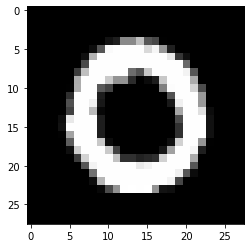

  0%|          | 2/42000 [00:01<8:45:27,  1.33it/s]

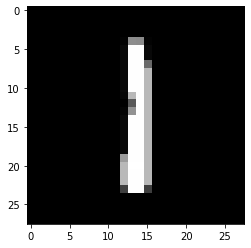

100%|██████████| 42000/42000 [00:09<00:00, 4645.67it/s]
C:\Users\Yashwanth\AppData\Roaming\Python\Python39\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [18]:
train_data = create_training_data()
numpy.save("C:/Users/Yashwanth/Documents/Project/ELearning-FYP/Digit_Recognition/train_data.npy",train_data) #Saving of train data to avoid doing preprocessing again and again

In [19]:
train_data = numpy.load("C:/Users/Yashwanth/Documents/Project/ELearning-FYP/Digit_Recognition/train_data.npy",allow_pickle=True) #Loading the data
print(len(train_data))

42000


In [21]:
def create_testing_data():
    with open(TEST_DIR, newline='') as f:
        reader = csv.reader(f)
        data = list(reader)
    test_data = []
    data = data[1:len(data)]
    j = 0
    for i in tqdm(data):
        img = chunks(i)
        img = numpy.array(img, dtype=np.uint8)
        if(j < 3):
            display_image(img)
        test_data.append(np.array(img))
        j += 1
    return test_data

  0%|          | 0/28000 [00:00<?, ?it/s]

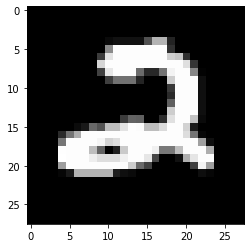

  0%|          | 1/28000 [00:00<3:22:11,  2.31it/s]

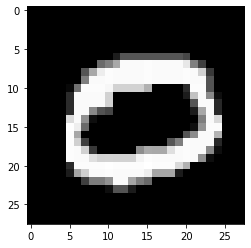

  0%|          | 2/28000 [00:00<3:16:13,  2.38it/s]

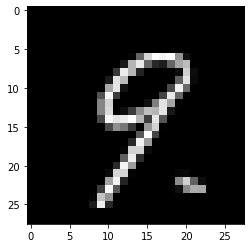

100%|██████████| 28000/28000 [00:05<00:00, 4731.37it/s]


In [22]:
test_data = create_testing_data()
numpy.save("C:/Users/Yashwanth/Documents/Project/ELearning-FYP/Digit_Recognition/test_data.npy",test_data) #Saving of test data to avoid doing preprocessing again and again

In [23]:
test_data = numpy.load("C:/Users/Yashwanth/Documents/Project/ELearning-FYP/Digit_Recognition/test_data.npy",allow_pickle=True) #Loading the data
print(len(test_data))

28000


In [24]:
random.shuffle(train_data)
random.shuffle(test_data)

In [25]:
x_train = []
y_train = []
for features,labels in train_data:
    x_train.append(features)
    y_train.append(labels)
numpy.save("C:/Users/Yashwanth/Documents/Project/ELearning-FYP/Digit_Recognition/x_train.npy", x_train)
numpy.save("C:/Users/Yashwanth/Documents/Project/ELearning-FYP/Digit_Recognition/y_train.npy", y_train)


In [26]:
x_test = []
for features in test_data:
    x_test.append(features)
numpy.save("C:/Users/Yashwanth/Documents/Project/ELearning-FYP/Digit_Recognition/x_test.npy", x_test)
